In [17]:
import pandas as pd
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import matplotlib.pyplot as plt

import sys
sys.path.append("../../ML/")
import viz

In [18]:
dataset_name = "House Prices"
df = pd.read_csv(os.path.join("data", dataset_name, "train.csv"))
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
# Using only a few fields

df = df[["LotFrontage", "LotArea", "GrLivArea", "GarageArea", "PoolArea", "YrSold", "SalePrice"]]
df = df.dropna()
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [20]:
# Scaling

scaler = StandardScaler()
X_train  = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

for col, model.coef_ in zip(X.columns, model.coef_):
    print(f"{col} : {model.coef_}")

LotFrontage : -1573.5586314464445
LotArea : 6654.854409312102
GrLivArea : 43440.30321135703
GarageArea : 29505.88321983226
PoolArea : -4394.17305269882
YrSold : -1148.2687650468642


In [42]:
alphas = [1, 10, 20, 50, 75, 100, 1000, 10000, 15000, 20000, 25000, 5e4, 1e6]

co_effs = {}
for col in X.columns:
    co_effs[col] = []


for alpha in alphas:
    model_lasso1 = Lasso(alpha=alpha)
    model_lasso1.fit(X_train, y_train)

    coefficients = model_lasso1.coef_
    for c, col in zip(coefficients, X.columns):
        co_effs[col].append(c)

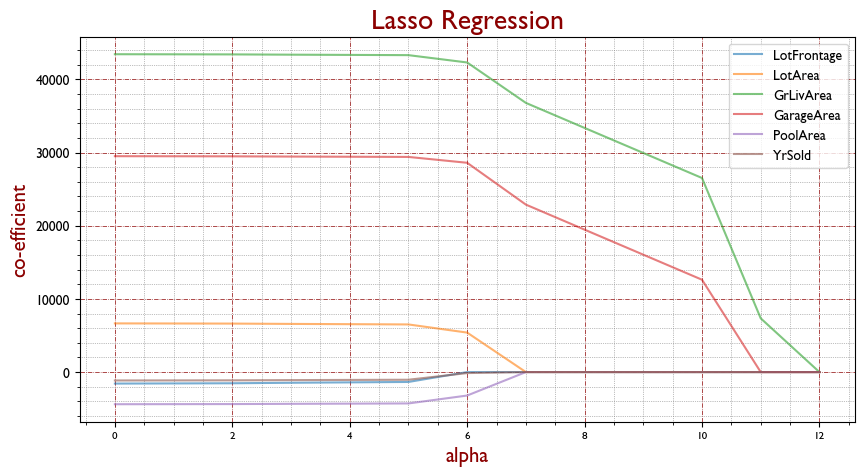

In [43]:
f, ax = plt.subplots(1,1, figsize =(10,5))

X_vals = list(range(len(alphas)))
for column_name in X.columns:
    co_efs = co_effs[column_name]
    viz.plot(X_vals,
             co_efs,
             ax=ax,
             xlabel="alpha", 
             ylabel="co-efficient", 
             title="Lasso Regression", 
             format_y=False,
             make_x_string=False, 
             label=column_name)

ax.legend()
plt.show()    


### Coefficients becoming 0

In [45]:
co_effs

{'LotFrontage': [-1571.4030527136852,
  -1551.2824576768812,
  -1528.5225734569055,
  -1461.4577493802162,
  -1405.5703959829696,
  -1349.6830425857333,
  -0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'LotArea': [6653.431279460444,
  6640.396004326204,
  6626.136773966411,
  6582.686558784875,
  6546.478046133567,
  6510.269533482283,
  5397.0609213226335,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'GrLivArea': [43439.20203017372,
  43427.78802368543,
  43415.1746270131,
  43377.1305980137,
  43345.427240514175,
  43313.72388301465,
  42311.108233916624,
  36788.59592150713,
  33366.98568138335,
  29945.37986141738,
  26524.320542543166,
  7346.582265126092,
  0.0],
 'GarageArea': [29504.81447149024,
  29495.523944702174,
  29485.017135123253,
  29454.048882314997,
  29428.242004974814,
  29402.43512763462,
  28602.991415499797,
  22886.400090345174,
  19464.90560696193,
  16043.409084409106,
  12621.660442261236,
  0.0,
  0.0],
 'PoolArea': [-4393.107245608735,
  -4383.3367287146

### Ridge Regression

In [46]:
alphas = [1, 10, 20, 50, 75, 100, 1000, 10000, 15000, 20000, 25000, 50000, 75000, 1e6, 1e7, 1e9]

co_effs = {}
for col in X.columns:
    co_effs[col] = []


for alpha in alphas:
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train, y_train)

    coefficients = model_ridge.coef_
    for c, col in zip(coefficients, X.columns):
        co_effs[col].append(c)

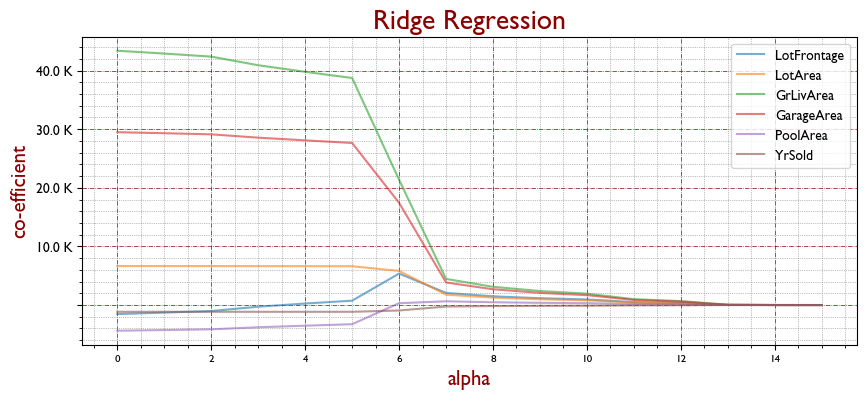

In [51]:
f, ax = plt.subplots(1,1, figsize =(10,4))

X_vals = list(range(len(alphas)))
for column_name in X.columns:
    co_efs = co_effs[column_name]
    viz.plot(X_vals,
             co_efs,
             ax=ax,
             xlabel="alpha", 
             ylabel="co-efficient", 
             title="Ridge Regression", 
             make_x_string=False, 
             label=column_name)

ax.legend()
plt.show()    


### Co-efficients near zero but not actually 0

In [50]:
co_effs

{'LotFrontage': [-1544.7257923952322,
  -1291.3145646964163,
  -1022.0816727261605,
  -285.125239597266,
  257.42628660507137,
  743.9129366907665,
  5367.13292229951,
  2071.3975915753235,
  1490.5948221820906,
  1163.1000468469174,
  953.3026977092592,
  500.8846034583731,
  339.60713528005624,
  26.29108803315237,
  2.6352652495715607,
  0.026359438968733682],
 'LotArea': [6654.394100207962,
  6650.449158641923,
  6646.428791577891,
  6635.935307740221,
  6628.116923284371,
  6620.415019714173,
  5820.71655003048,
  1768.7127533851155,
  1263.2326444788794,
  982.0606945716089,
  803.1591092881985,
  420.1779576449294,
  284.48228286132075,
  21.966253682319337,
  2.2013535421564407,
  0.02201874752663981],
 'GrLivArea': [43385.64176633104,
  42901.780085783656,
  42380.61169351009,
  40912.232426285475,
  39785.91716363567,
  38736.982464684384,
  21380.049587339916,
  4457.329016840389,
  3110.984650893574,
  2389.8807066919594,
  1940.3276405513204,
  1000.0968615581982,
  673.70